In [1]:
import os

path = os.path.join(os.getcwd(), '..', 'data', 'CINIC-10')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\jdudz\AppData\Roaming\uv\python\cpython-3.10.16-windows-x86_64-none\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\jdudz\AppData\Roaming\uv\python\cpython-3.10.16-windows-x86_64-none\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\jdudz\Documents\DeepLearningImageClassification\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jdudz\Documents\D

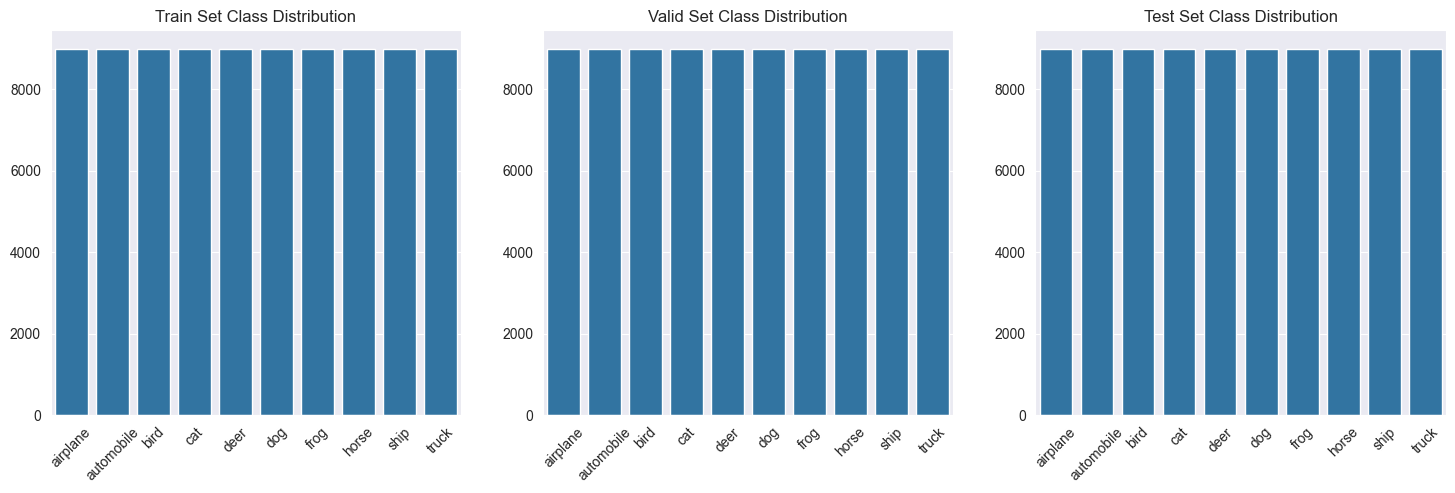

In [2]:
from matplotlib import pyplot as plt
from torchvision.datasets import ImageFolder
from pathlib import Path
import seaborn as sns

dataset_stats = {}
splits = ['train', 'valid', 'test']

for split in splits:
    split_path = Path(path) / split
    dataset = ImageFolder(split_path)
    class_counts = {dataset.classes[i]: 0 for i in range(len(dataset.classes))}

    for _, label in dataset.samples:
        class_counts[dataset.classes[label]] += 1

    dataset_stats[split] = class_counts

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (split, class_counts) in enumerate(dataset_stats.items()):
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), ax=axes[i])
    axes[i].set_title(f'{split.capitalize()} Set Class Distribution')
    axes[i].set_xticks(range(len(class_counts)))
    axes[i].set_xticklabels(class_counts.keys(), rotation=45)

plt.show()

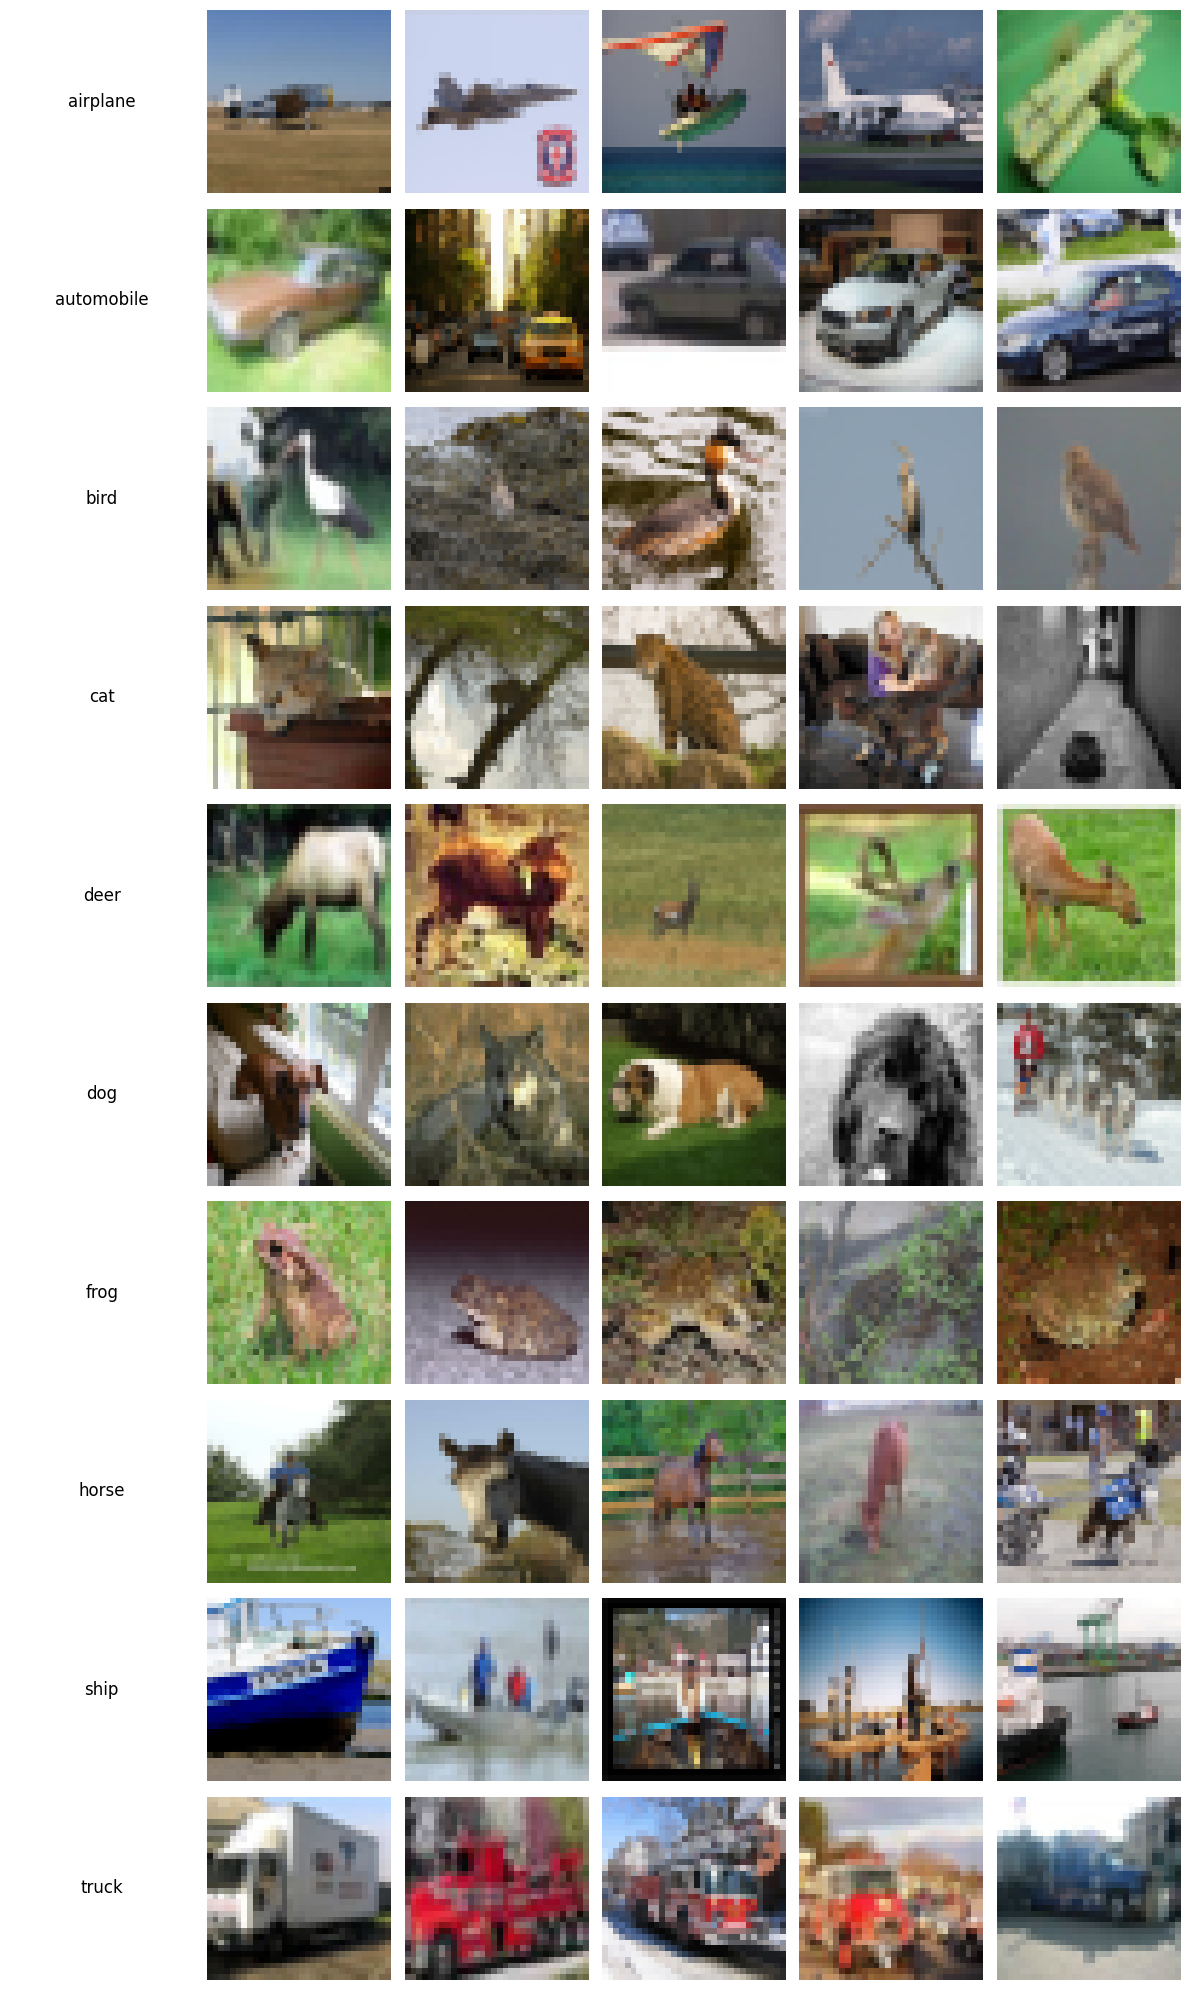

In [23]:
from PIL import Image
import os
import numpy as np

num_samples = 5
dataset = ImageFolder(Path(path) / "train")
class_names = dataset.classes
fig, axes = plt.subplots(len(class_names), num_samples + 1, figsize=((num_samples + 1) * 2, len(class_names) * 2))

for i, class_name in enumerate(class_names):
    class_path = Path(path) / "train" / class_name
    sample_images = np.random.choice(os.listdir(class_path), num_samples, replace=False)

    # Display class name in the first column
    axes[i, 0].text(0.5, 0.5, class_name, fontsize=12, ha='center', va='center')
    axes[i, 0].axis("off")

    for j, img_name in enumerate(sample_images):
        img = Image.open(class_path / img_name)
        axes[i, j + 1].imshow(img)
        axes[i, j + 1].axis("off")

plt.tight_layout()
plt.show()

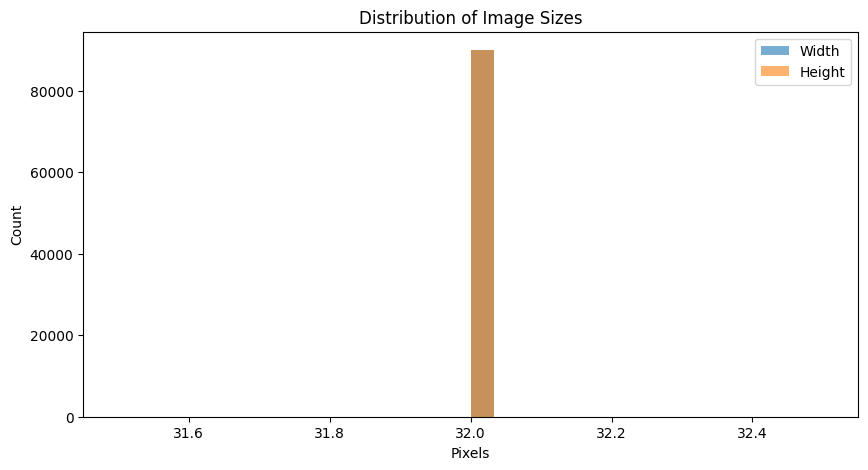

In [24]:
image_sizes = []

for img_path, _ in dataset.samples:
    img = Image.open(img_path)
    image_sizes.append(img.size)

image_sizes = np.array(image_sizes)

plt.figure(figsize=(10, 5))
plt.hist(image_sizes[:, 0], bins=30, alpha=0.6, label='Width')
plt.hist(image_sizes[:, 1], bins=30, alpha=0.6, label='Height')
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.title("Distribution of Image Sizes")
plt.legend()
plt.show()


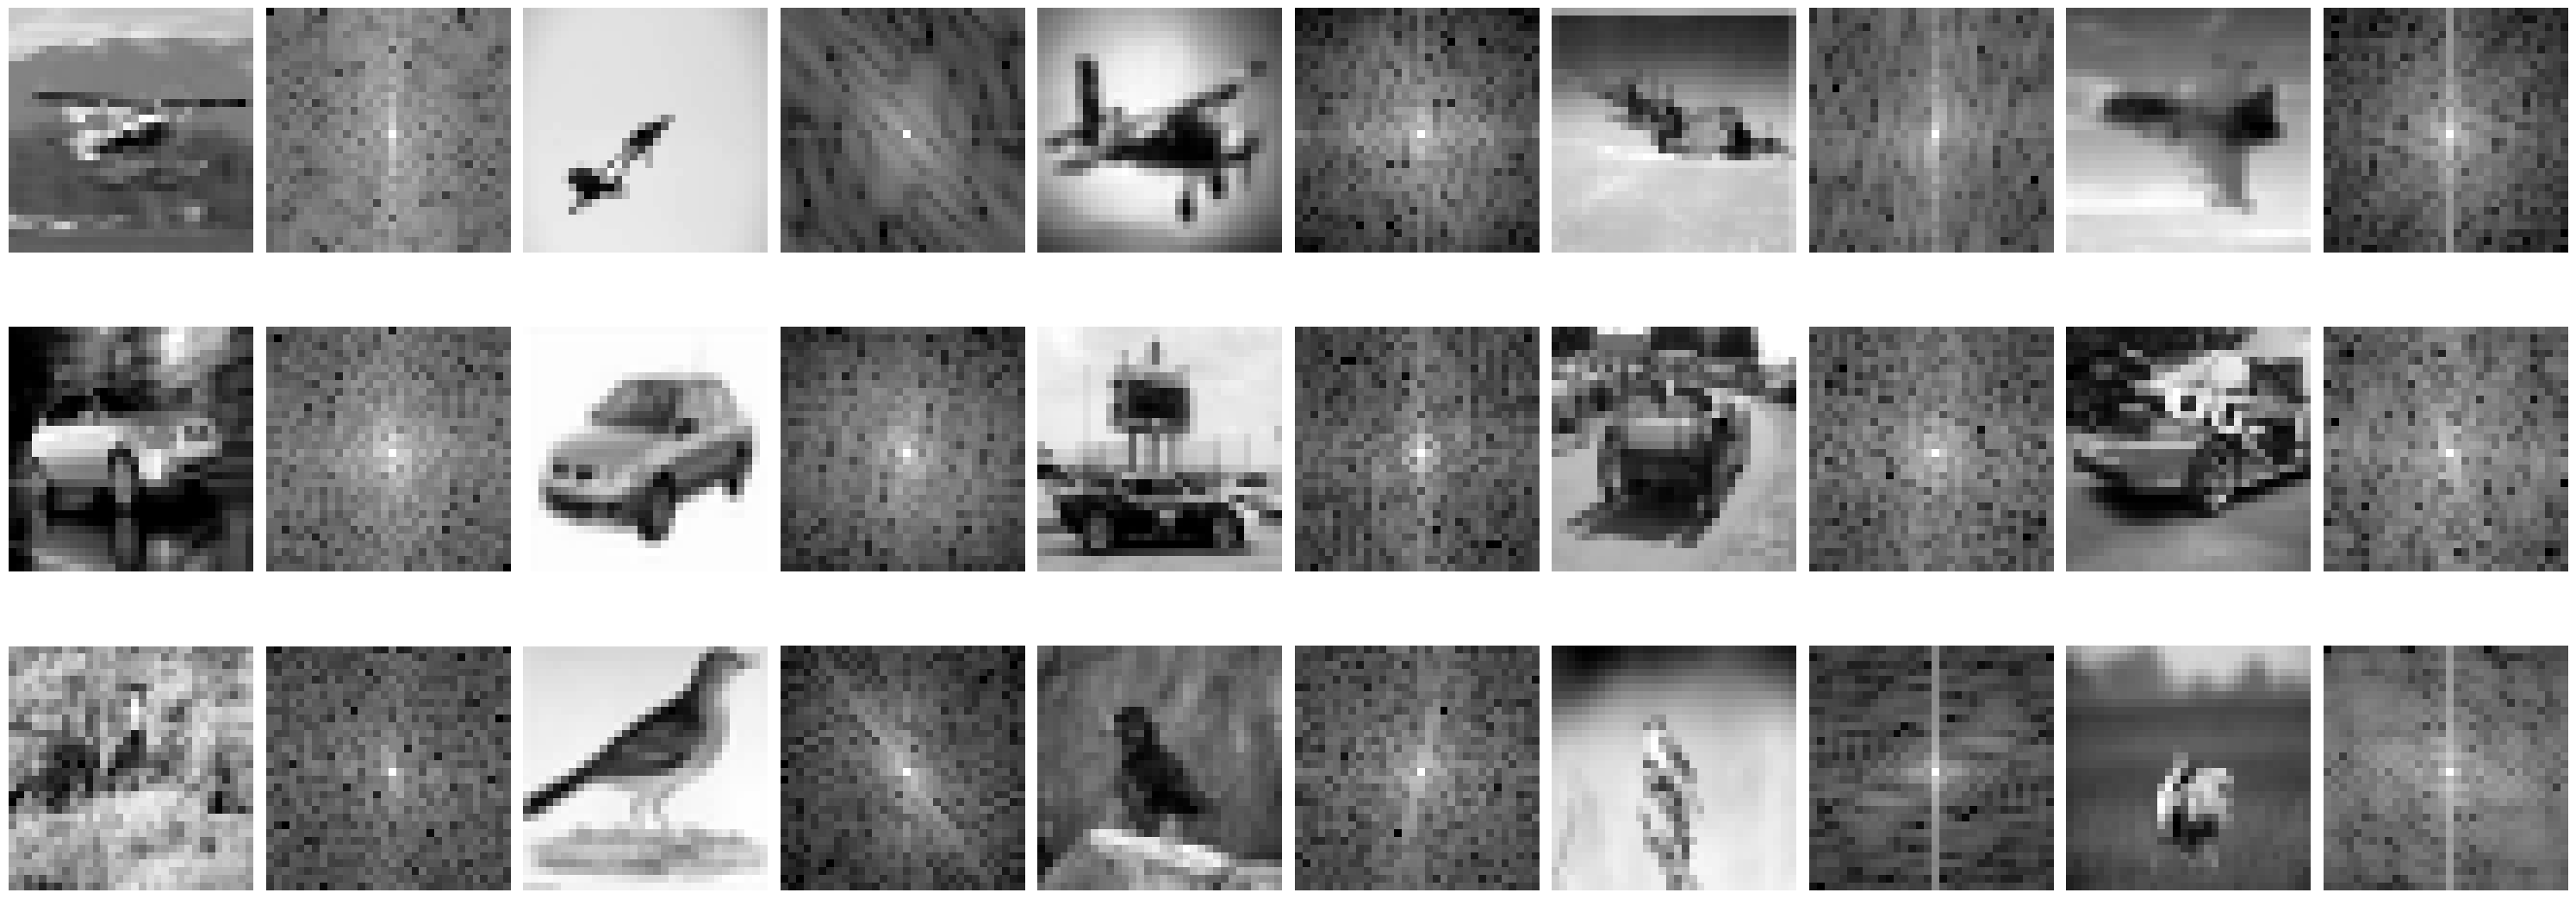

In [29]:
num_samples = 5
class_names = dataset.classes[:3]  # Limit to 3 classes for visualization
fig, axes = plt.subplots(len(class_names), num_samples * 2, figsize=(num_samples * 6, len(class_names) * 4))

for i, class_name in enumerate(class_names):
    class_path = Path(path) / "train" / class_name
    sample_images = np.random.choice(os.listdir(class_path), num_samples, replace=False)

    for j, img_name in enumerate(sample_images):
        img = Image.open(class_path / img_name).convert("L")
        img_array = np.array(img)
        f = np.fft.fft2(img_array)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        axes[i, j * 2].imshow(img, cmap='gray')
        axes[i, j * 2].axis("off")
        if j == 0:
            axes[i, j * 2].set_ylabel(class_name, fontsize=12)

        axes[i, j * 2 + 1].imshow(magnitude_spectrum, cmap='gray')
        axes[i, j * 2 + 1].axis("off")

plt.tight_layout()
plt.show()